In [11]:
from sample_reader.sample_reader import SampleReader

In [12]:
samples_fv = SampleReader().read('AbVitro/flu_time_course/FV/', ['25'])
samples_gmc = SampleReader().read('AbVitro/flu_time_course/GMC/', ['8'])
samples_ido = SampleReader().read('AbVitro/flu_time_course/IDO/')
samples_age = SampleReader().read('age/')
samples_paired = SampleReader().read('AbVitro/paired/')

In [13]:
from shm_kmer_model_estimator.shm_kmer_model_estimator import ShmKmerModelEstimator

In [14]:
estimator = ShmKmerModelEstimator()
est_model = estimator.estimate_models_of_one_type((samples_age,
                                                   samples_ido,
                                                   samples_fv,
                                                   samples_gmc,
                                                   samples_paired
                                                  ),
                                                  chains=['IGH'])

NoKNeighbours: IGH
Trivial: IGH


In [24]:
est_model['NoKNeighbours']['IGH']
None

In [16]:
#est_model['NoKNeighbours']['IGH'].to_csv('/Users/andrewbzikadze/chihua/datasets/shm_model_no_kneighbours.csv', na_rep='NaN')
#est_model['Trivial']['IGH'].to_csv('/Users/andrewbzikadze/chihua/datasets/shm_model_trivial.csv', na_rep='NaN')

In [17]:
def apply_to_datasets(datasets, func):
    result = dict.fromkeys(datasets)
    for strategy in datasets:
        result[strategy] = dict.fromkeys(datasets[strategy])
        for chain_type in datasets[strategy]:
            result[strategy][chain_type] = \
            func(datasets[strategy][chain_type])
    return result

In [18]:
apply_to_datasets(est_model, (lambda x: x.isnull().any(axis=1).mean()))

{'NoKNeighbours': {'IGH': 0.1611328125}, 'Trivial': {'IGH': 0.1201171875}}

In [19]:
apply_to_datasets(est_model, (lambda x: x['success_optim_beta'].mean()))

{'NoKNeighbours': {'IGH': 0.8505859375}, 'Trivial': {'IGH': 0.9228515625}}

In [20]:
apply_to_datasets(est_model, lambda x: x['success_optim_dir'].mean())

{'NoKNeighbours': {'IGH': 0.98828125}, 'Trivial': {'IGH': 0.994140625}}

In [22]:
def sd_beta(x):
    a, b = x['beta_shape1'], x['beta_shape2']
    return np.sqrt(a * b / ((a + b)**2 * (a + b + 1)))

In [23]:
apply_to_datasets(est_model, sd_beta)
None

In [28]:
def sd_dir(x):
    alpha = x.ix[:, np.arange(2, 5)]
    alpha_sum = np.sum(alpha)
    denominator = alpha_sum * np.sqrt(alpha_sum + 1)
    return np.sqrt(alpha * (alpha_sum - alpha)) / denominator
    # a, b, c = x['dir_shape1'], x['dir_shape2'], x['dir_shape1']
    # a0 = a + b = c
    # denominator = a0 * np.sqrt(a0 + 1)
    # return np.sqrt(

In [29]:
apply_to_datasets(est_model, sd_dir)
None

In [30]:
apply_to_datasets(est_model, (lambda x: np.nanstd(np.array(x.ix[:,0:2].T / np.sum(x.ix[:,0:2], axis=1)).T - \
                                        np.array(x.ix[:,7:9]))))

{'NoKNeighbours': {'IGH': 0.017479290381984831},
 'Trivial': {'IGH': 0.014590950009082691}}

In [31]:
apply_to_datasets(est_model, (lambda x: np.nanstd(np.array(x.ix[:,2:5].T / np.sum(x.ix[:,2:5], axis=1)).T - \
                                        np.array(x.ix[:,9:12]))))

{'NoKNeighbours': {'IGH': 0.033168516056584725},
 'Trivial': {'IGH': 0.02091559250794919}}

## hot/cold spots

In [14]:
import re

In [15]:
kmer_names = [''.join(p) for p in itertools.product(['A', 'C', 'G', 'T'], repeat=5)]
hotspots  = filter(lambda kmer_name: re.search(r"^([AT][GA]C[ACT].)|(.[AGT]G[CT][AT])$",
                                               kmer_name), kmer_names)
coldspots = filter(lambda kmer_name: re.search(r"^([CG][CT]C..)|(..G[GA][CG])$", kmer_name), kmer_names)

In [16]:
hotspots_ind  = np.array([i for i in xrange(len(kmer_names)) if kmer_names[i] in hotspots])
coldspots_ind = np.array([i for i in xrange(len(kmer_names)) if kmer_names[i] in coldspots])

In [17]:
colors = np.array(['black'] * 1024)
colors[hotspots_ind] = 'red'
colors[coldspots_ind] = 'blue'

Cold Spot. SYC, where S={C, G}, Y={C, T}.
For example, CCC**

In [50]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

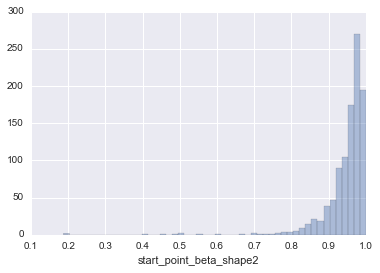

In [56]:
sns.distplot(est_model['NoKNeighbours']['IGH']['start_point_beta_shape2'].dropna(), kde=False, rug=False)

In [68]:
est_model['NoKNeighbours']['IGH'].sort_values('start_point_beta_shape2').tail(50)

,beta_shape1,beta_shape2,dir_shape1,dir_shape2,dir_shape3,success_optim_beta,success_optim_dir,start_point_beta_shape1,start_point_beta_shape2,start_point_dir_shape1,start_point_dir_shape2,start_point_dir_shape_3
ACTCG,11.537572,912.603037,NaN,NaN,NaN,1.0,1.0,0.006845,0.993155,NaN,NaN,NaN
TTAAA,2.619066,386.952292,NaN,NaN,NaN,1.0,1.0,0.006762,0.993238,NaN,NaN,NaN
AGACA,1.068026,99.145135,28.762662,33.860955,14.818212,0.0,1.0,0.006561,0.993439,0.373293,0.434275,0.192432
CGCGC,1273.695845,70937.138078,NaN,NaN,NaN,1.0,1.0,0.006543,0.993457,NaN,NaN,NaN
CTGGC,1.038575,91.790435,3.840995,3.466446,5.116736,0.0,1.0,0.006502,0.993498,0.275317,0.314737,0.409946
TAGCC,1.490603,71.990987,NaN,NaN,NaN,1.0,1.0,0.006349,0.993651,NaN,NaN,NaN
GGTGC,1.650793,160.717401,6.995010,10.285342,6.902150,0.0,1.0,0.006349,0.993651,0.286615,0.424433,0.288952
AGGTG,8.547975,1461.411307,11.732861,5.547702,8.049109,1.0,1.0,0.005830,0.994170,0.462817,0.214474,0.322709
CGGCC,0.809550,33.077910,98.578944,22.106622,92.972085,0.0,1.0,0.005690,0.994310,0.462065,0.103828,0.434106
CCGAG,4.977935,990.561290,11.295420,6.480345,9.480436,1.0,1.0,0.004993,0.995007,0.404923,0.250759,0.344318


CGAGA, GCGAG, CCGAG...

In [69]:
est_model['NoKNeighbours']['IGH'].sort_values('start_point_beta_shape2').head(50)

,beta_shape1,beta_shape2,dir_shape1,dir_shape2,dir_shape3,success_optim_beta,success_optim_dir,start_point_beta_shape1,start_point_beta_shape2,start_point_dir_shape1,start_point_dir_shape2,start_point_dir_shape_3
AGCGA,654.639425,196.104539,NaN,NaN,NaN,1.0,1.0,0.813187,0.186813,NaN,NaN,NaN
TTGCT,6.086736,1.050725,NaN,NaN,NaN,1.0,1.0,0.797864,0.202136,NaN,NaN,NaN
GTCGC,4031.939059,2969.400704,NaN,NaN,NaN,1.0,1.0,0.588027,0.411973,NaN,NaN,NaN
TACCC,0.545455,0.454545,NaN,NaN,NaN,0.0,1.0,0.545455,0.454545,NaN,NaN,NaN
CATTC,5.475848,5.160976,0.913042,2.283214,3.500813,1.0,1.0,0.512223,0.487777,0.122410,0.346602,0.530988
GACGT,0.500000,0.500000,NaN,NaN,NaN,1.0,1.0,0.500000,0.500000,NaN,NaN,NaN
GGCGA,2893.315975,3087.010108,NaN,NaN,NaN,1.0,1.0,0.490080,0.509920,NaN,NaN,NaN
GGTCG,0.779920,0.837334,0.772253,9.902609,1.021172,1.0,1.0,0.445757,0.554243,0.075178,0.818859,0.105962
AACGT,1.094974,1.772979,4.498957,7.268967,1.773798,1.0,1.0,0.393949,0.606051,0.335833,0.541562,0.122605
TCGCT,10.952824,16.308985,NaN,NaN,NaN,1.0,1.0,0.329084,0.670916,NaN,NaN,NaN


Первые несколько 5-меров просто не встречаются в данных (это легко увидеть, посмотрев на сами данные).
ACGGG -- это один из них. В статье Yarri отмечен как пик на графике-еже.

In [77]:
est_model['NoKNeighbours']['IGH'].sort_values('start_point_beta_shape2').index.get_loc('ATGCA')

125

In [79]:
est_model['NoKNeighbours']['IGH'].sort_values('start_point_beta_shape2').index.get_loc('ACGGG')

16

In [80]:
est_model['NoKNeighbours']['IGH'].sort_values('start_point_beta_shape2').index.get_loc('AGCCA')

165

# Box plots for ``natural diversity''

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 10  # that's default image size for this interactive session

In [6]:
all_samp = np.concatenate((samples_fv['NoKNeighbours']['IGH'],
                           samples_ido['NoKNeighbours']['IGH'],
                           samples_gmc['NoKNeighbours']['IGH'],
                           samples_age['NoKNeighbours']['IGH'],
                           samples_paired['NoKNeighbours']['IGH']))

In [7]:
from calculate_mutability_diversity import *

In [8]:
coverage = np.median(np.min(all_samp, 2), 0)
coverage_threshold = 100
ind_coverage = coverage > coverage_threshold
ind_coverage

array([False, False, False, ..., False, False, False], dtype=bool)

In [9]:
np.mean(coverage > coverage_threshold)

0.2197265625

In [10]:
mutability_diversity, sorted_ind = calculate_mutability_diversity(all_samp, calculate_mutability)

/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3558: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [12]:
#mutability_diversity.sort_index().std(1).to_csv("mutability_std.csv")

/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


NameError: name 'colors' is not defined

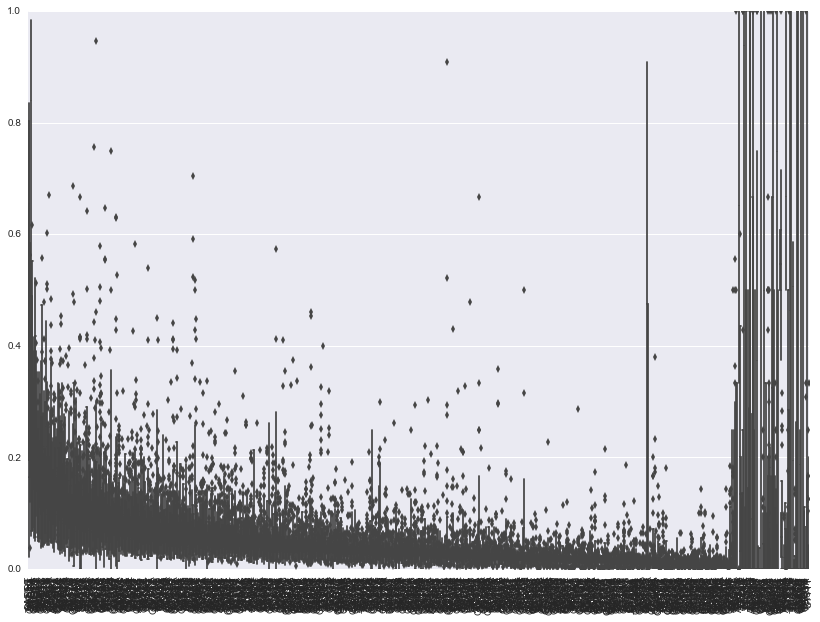

In [13]:
g = sns.boxplot(mutability_diversity.T)
_= g.set_xticklabels(g.get_xticklabels(), rotation=90)
_= [t.set_color(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.xaxis.get_ticklabels())]
_= [t.set_facecolor(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.artists)]

In [17]:
substitution_1_diversity, sorted_ind_substitution_1 = \
    calculate_mutability_diversity(all_samp, calculate_substitution_1, ind_coverage)

substitution_2_diversity, sorted_ind_substitution_2 = \
    calculate_mutability_diversity(all_samp, calculate_substitution_2, ind_coverage)
    
substitution_3_diversity, sorted_ind_substitution_3 = \
    calculate_mutability_diversity(all_samp, calculate_substitution_3, ind_coverage)

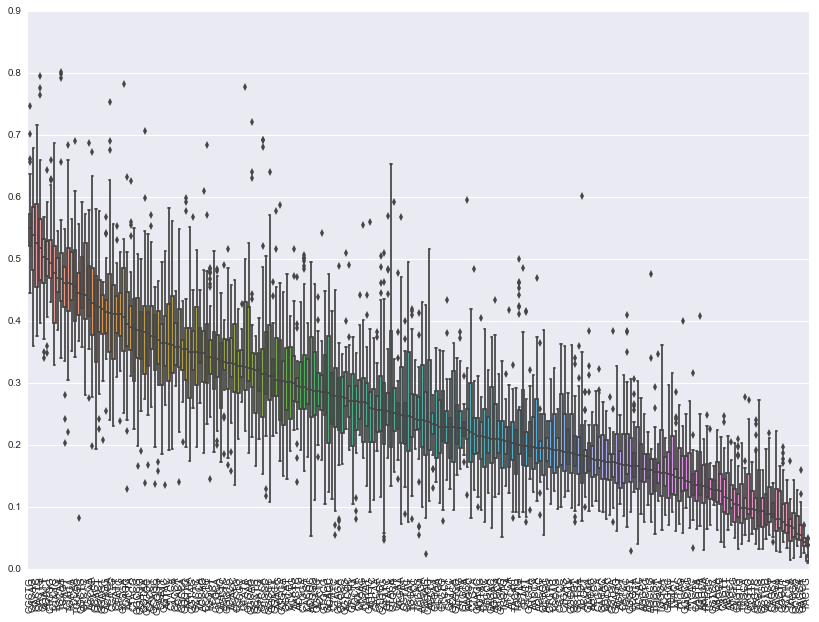

In [18]:
g = sns.boxplot(substitution_1_diversity.T)
_= g.set_xticklabels(g.get_xticklabels(), rotation=90)

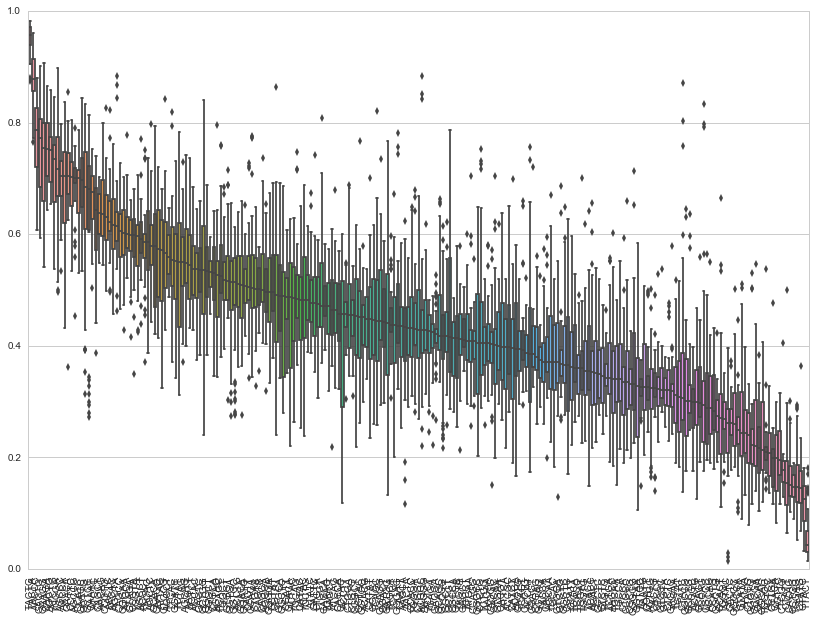

In [780]:
g = sns.boxplot(substitution_2_diversity.T)
_= g.set_xticklabels(g.get_xticklabels(), rotation=90)

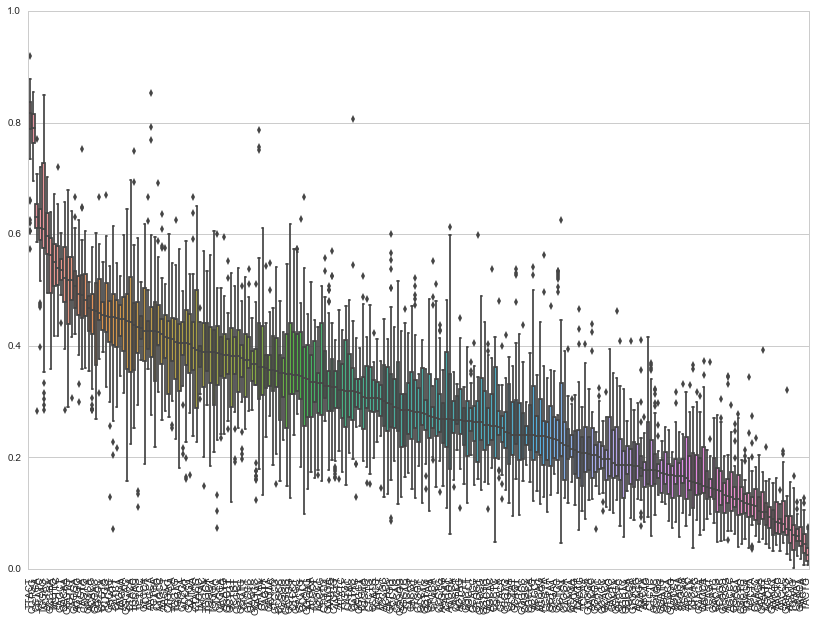

In [781]:
g = sns.boxplot(substitution_3_diversity.T)
_= g.set_xticklabels(g.get_xticklabels(), rotation=90)